In [2]:
import numpy as np
import scipy as sp
import sympy as sy

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.special as spe
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

from sympy import *

In [49]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()
plt.rcParams["font.family"] = "Times New Roman"

blues = mpl.colormaps["Blues"].resampled(30)
purples = mpl.colormaps["Purples"].resampled(22)
reds = mpl.colormaps["Reds"].resampled(12)
orange = mpl.colormaps["YlOrBr"].resampled(22)
green = mpl.colormaps["YlGn"].resampled(30)
spectrum = mpl.colormaps["viridis"].resampled(30)

Construct H_loc (Matrix form)

In [26]:
gam_arr = np.linspace(0,1,200)

H_loc = np.zeros((len(gam_arr),3,3))

for i in range(len(gam_arr)):
    H_loc[i][0][0] = spe.mathieu_a(0,gam_arr)[i]
    H_loc[i][1][1] = spe.mathieu_b(1,gam_arr)[i]
    H_loc[i][2][2] = spe.mathieu_a(1,gam_arr)[i]

Construct H_loc (Array form)

In [55]:
H_loc00 = np.zeros(len(gam_arr))
H_loc11 = np.zeros(len(gam_arr))
H_loc22 = np.zeros(len(gam_arr))

for i in range(len(gam_arr)):
    H_loc00[i] = spe.mathieu_a(0,gam_arr)[i]
    H_loc11[i] = spe.mathieu_b(1,gam_arr)[i]
    H_loc22[i] = spe.mathieu_a(1,gam_arr)[i]

Code check

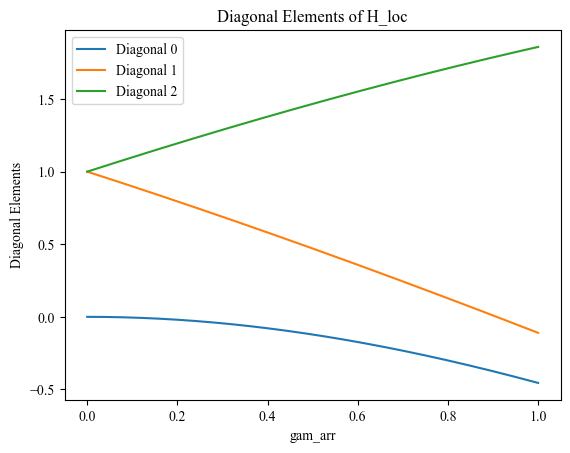

In [50]:
for i in range(3):
    diagonal_elements = np.diagonal(H_loc[:, :, :], axis1=1, axis2=2)[:, i]
    plt.plot(gam_arr, diagonal_elements, label=f'Diagonal {i}')

plt.xlabel('gam_arr')
plt.ylabel('Diagonal Elements')
plt.title('Diagonal Elements of H_loc')
plt.legend()
plt.show()

Data output

In [58]:
df = np.column_stack((gam_arr, H_loc00, H_loc11, H_loc22))
np.savetxt('./M_H_loc_gam_{}to{}.txt'.format(int(gam_arr[0]),int(gam_arr[len(gam_arr)-1])),df)